<a href="https://colab.research.google.com/github/akshaykasar/Projects/blob/master/EDACovid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
#import wordcloud
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
#from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("covid_19_india (1).csv")
data.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [4]:
#Understand the data
data = pd.DataFrame(data)
data.shape
data.columns
len(data.ConfirmedIndianNational)
len(data.Deaths)
len(data.Cured)
len(data.Date)
data.info()
data.describe()
data['ConfirmedIndianNational'].describe()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       617 non-null    float64
 1   Date                      617 non-null    object 
 2   Time                      617 non-null    object 
 3   State/UnionTerritory      617 non-null    object 
 4   ConfirmedIndianNational   617 non-null    object 
 5   ConfirmedForeignNational  617 non-null    object 
 6   Cured                     617 non-null    float64
 7   Deaths                    617 non-null    float64
 8   Confirmed                 617 non-null    float64
dtypes: float64(4), object(5)
memory usage: 45.6+ KB


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0


In [5]:
#If needed we can also replace the name of column
data = data.rename(columns = {"State/UnionTerritory":"State",
                              "ConfirmedIndianNational":"Confirmed_Indian",
                              "ConfirmedForeignNational":"Confirmed_Foreginer",
                              "Cured":"Recovered"})
data.columns

Index(['Sno', 'Date', 'Time', 'State', 'Confirmed_Indian',
       'Confirmed_Foreginer', 'Recovered', 'Deaths', 'Confirmed'],
      dtype='object')

In [6]:
#Drop the SNo or column
#ab = data.ix[:,1:]  Another method for droppping column
df = data.drop(['Sno','Time'],1)
df.columns
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df['Date'] = pd.to_datetime(df['Date'])
#df['Confirmed_Total'] = df['Confirmed_Indian']+df['Confirmed_Foreginer']
df.columns

Index(['Date', 'State', 'Confirmed_Indian', 'Confirmed_Foreginer', 'Recovered',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
#missing values checkup
df.isna().sum()

df.describe()

,Recovered,Deaths,Confirmed
count,617.000000,617.000000,617.000000
mean,2.059968,0.580227,26.171799
std,5.165253,1.480544,48.216735
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,7.000000
75%,2.000000,1.000000,29.000000
max,42.000000,16.000000,335.000000


In [8]:
df.head()
df.columns
df['State'] = df['State'].replace("Uttar Pradesh", "Uttar_Pradesh")
df['State'] = df['State'].replace("Andaman and Nicobar Islands", "Andaman_and_Nicobar_Islands")
df['State'] = df['State'].replace("Andhra Pradesh", "Andhra_Pradesh")
df['State'] = df['State'].replace("Himachal Pradesh", "Himachal_Pradesh")
df['State'] = df['State'].replace("Jammu and Kashmir", "Jammu_and_Kashmir")
df['State'] = df['State'].replace("Madhya Pradesh", "Madhya_Pradesh")
df['State'] = df['State'].replace("Tamil Nadu", "Tamil_Nadu")
df['State'] = df['State'].replace("West Bengal", "West_Bengal")

In [9]:
df_per_day=df.groupby('Date')['Confirmed_Indian','Confirmed_Foreginer','Confirmed',
          'Deaths', 'Recovered'].sum()
df_per_day1=df.groupby('Date')['Confirmed_Indian','Confirmed_Foreginer','Confirmed',
          'Deaths', 'Recovered'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [10]:
#maximum number of cases
df_per_day['Confirmed'].max() 
df_per_day1['Confirmed'].max()

#minimum number of cases
df_per_day['Confirmed'].min()

#which day has max cases
df_per_day['Confirmed'].idxmax()

#which day has minimum cases
df_per_day['Confirmed'].idxmin()

Timestamp('2020-01-30 00:00:00')

In [11]:
#No of cases per country State

df.groupby(['State'])['Confirmed_Indian','Confirmed_Foreginer','Confirmed',
          'Deaths', 'Recovered'].max()
#no of cases per country by descending order
a=df.groupby(['State'])['Confirmed_Indian','Confirmed_Foreginer','Confirmed','Deaths', 'Recovered'].max().sort_values(by = 'Confirmed', ascending= False)

#how many countried affected
States = df['State'].unique()
len(df['State'].unique())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


34

No handles with labels found to put in legend.


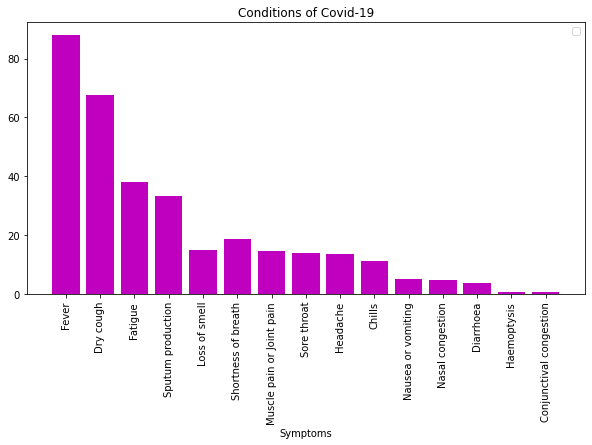

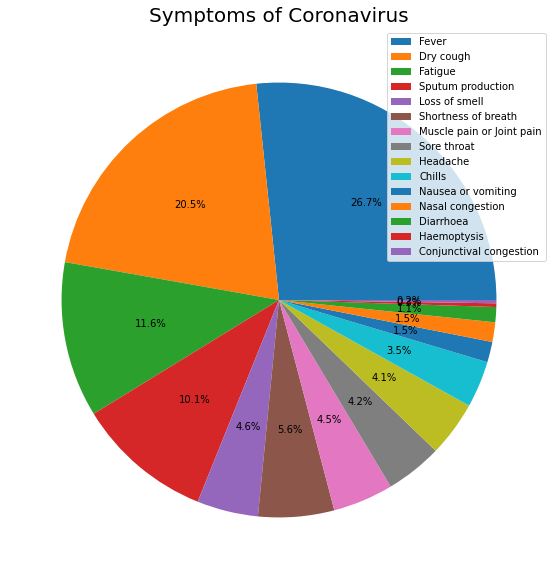

In [13]:
## COVID-19 ######## Symptoms Anlaysis

symptoms={'symptom':['Fever','Dry cough','Fatigue','Sputum production',
                     'Loss of smell','Shortness of breath','Muscle pain or Joint pain',
                     'Sore throat','Headache','Chills','Nausea or vomiting',
                     'Nasal congestion','Diarrhoea','Haemoptysis','Conjunctival congestion']
,'percentage':[87.9,67.7,38.1,33.4,15,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

con_symptoms=pd.DataFrame(data=symptoms)
con_symptoms

# Graph for Symptoms and Percentage
plt.figure(figsize=(10,5))
plt.bar(con_symptoms['symptom'],con_symptoms['percentage'], color = 'm')
plt.legend()
plt.title('Conditions of Covid-19')
plt.xlabel('Symptoms')
plt.xticks(rotation=90)

# Pie plot for symptoms
plt.figure(figsize=(15,10))
plt.title('Symptoms of Coronavirus',fontsize=20) 
plt.pie(con_symptoms['percentage'],autopct='%1.1f%%')
plt.legend(symptoms['symptom'],loc='best')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

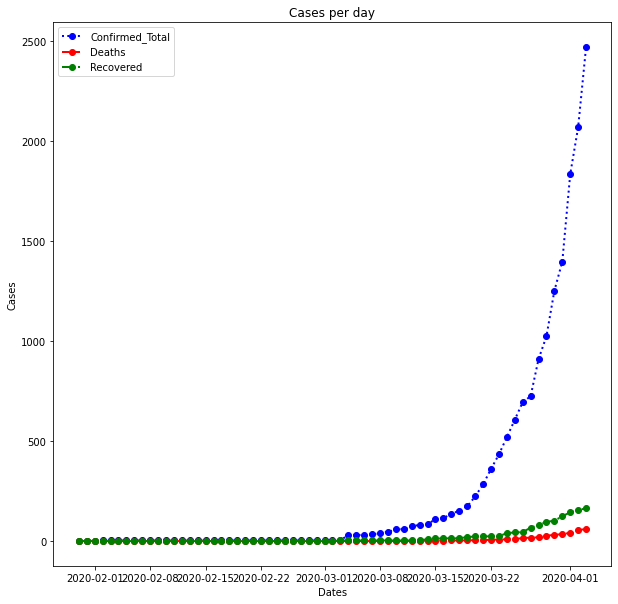

In [14]:
#Graph for Cases observed per day

b = df.groupby(['Date'])['Recovered','Deaths','Confirmed',].sum().sort_values(by = 'Date', ascending = True)

import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(b['Confirmed'],'bo', label = 'Confirmed_Total', linewidth = 2, linestyle = ':')
plt.plot(b['Deaths'],'ro', label = 'Deaths',linewidth = 2, linestyle = '--',)
plt.plot(b['Recovered'],'go', label = 'Recovered',linewidth = 2,linestyle = '-.')
plt.title('Cases per day')
plt.xlabel('Dates')
#plt.xticks([0,9,19,29])
plt.ylabel('Cases')
plt.legend()
plt.show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


<function matplotlib.pyplot.show>

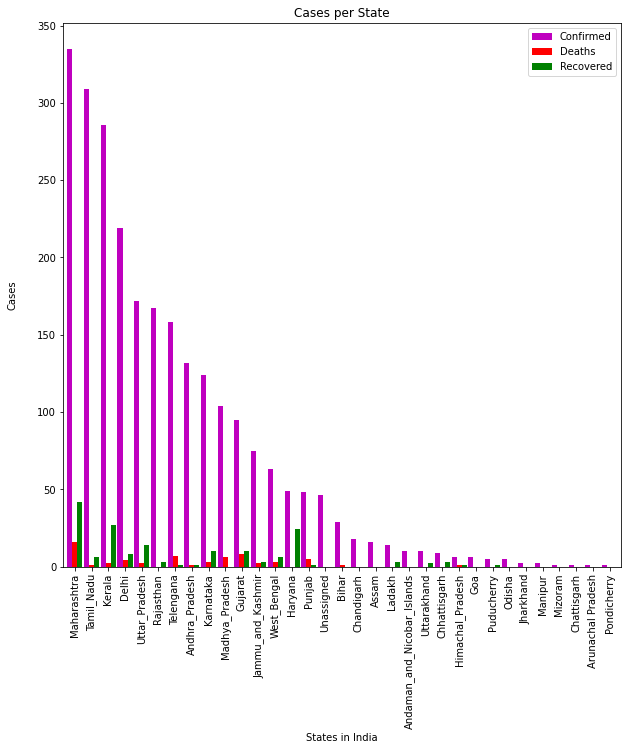

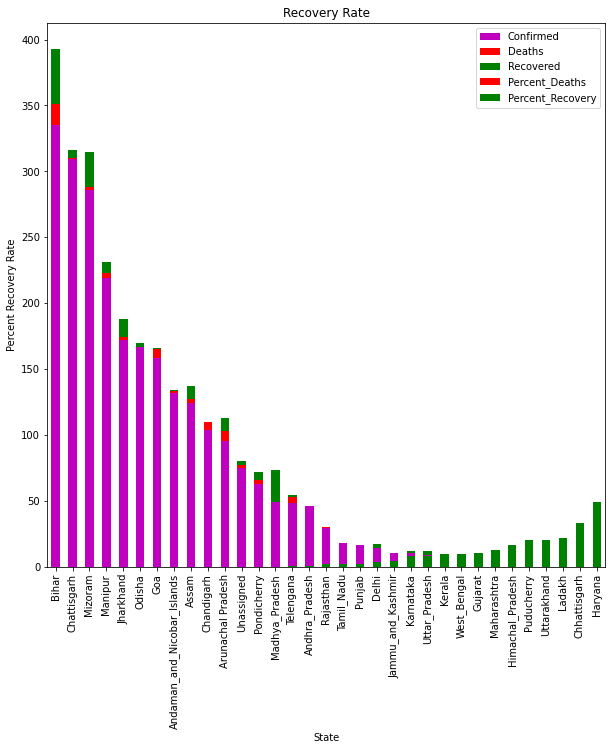

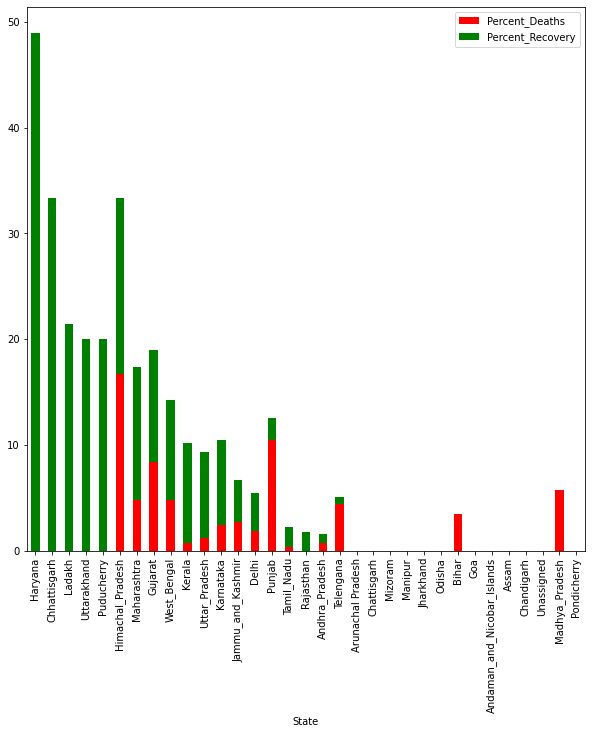

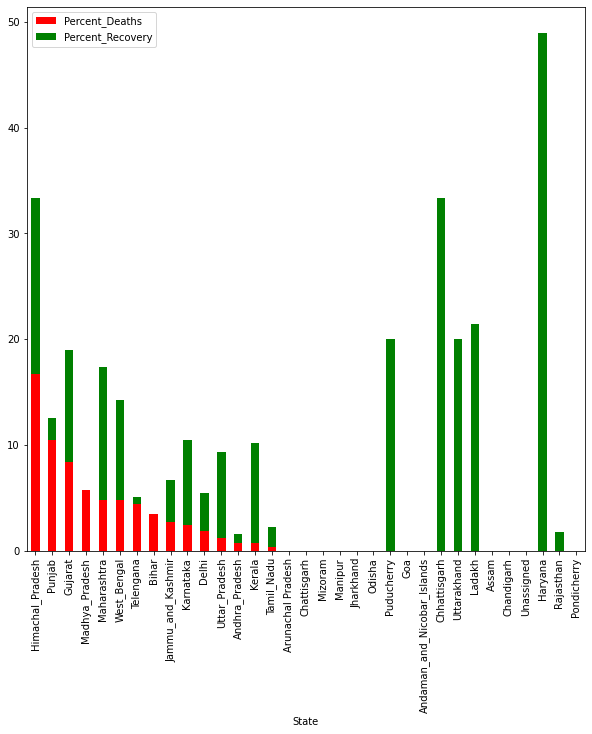

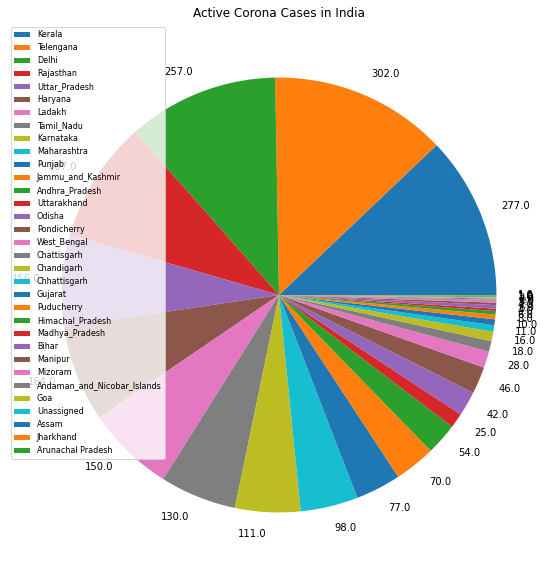

In [15]:
# Cases observed per state
import seaborn as sns
c=df.groupby(['State'])['Confirmed','Deaths', 'Recovered'].max().sort_values(by = 'Confirmed', ascending= False)

c.head(45).plot.bar(color = ('m','r','g'), figsize = (10,10), width = 0.9)
plt.title('Cases per State')
plt.xlabel('States in India')
plt.ylabel('Cases', labelpad = 20)
plt.legend()
plt.show

#Cases in State in Stacked form
c.head(45).plot.bar(stacked = True, color = ('m','r','g'), figsize = (20,10))
plt.title('Cases per State')
plt.xlabel('State')
plt.ylabel('Cases')
plt.legend()
plt.show

#make another group for adding calculated columns
c = df.groupby(['State'])['Confirmed','Deaths', 'Recovered'].max().sort_values(by = 'Confirmed', ascending= False)

# percent Death Rate
c['Percent_Deaths'] = c['Deaths']/c['Confirmed']*100
c['Percent_Deaths']= round(c['Percent_Deaths'], 2)

#Death rate state wise
c['Percent_Deaths'].sort_values().head(55).plot.bar(figsize = (10,10), color = 'r')
plt.title('Death Rate')
plt.xlabel('State')
plt.ylabel('Percent Death Rate')
plt.legend()
plt.show

# percent Recoverey rate
c['Percent_Recovery']=c['Recovered']/c['Confirmed']*100
c['Percent_Recovery'] = round(c['Percent_Recovery'], 2)

# Percent recovery rate Country wise
c['Percent_Recovery'].sort_values().tail(55).plot.bar(figsize = (10,10), color = 'g')
plt.title('Recovery Rate')
plt.xlabel('State')
plt.ylabel('Percent Recovery Rate')
plt.legend()
plt.show

# Stacked plot for Recovery rate and Death rate
c[['Percent_Deaths', 'Percent_Recovery']].sort_values(by = 'Percent_Recovery', ascending = False).plot.bar(stacked = True, figsize = (10,10), color = ('r','g'))

c[['Percent_Deaths', 'Percent_Recovery']].sort_values(by = 'Percent_Deaths', ascending = False).plot.bar(stacked = True, figsize = (10,10), color = ('r','g'))

# Active Cases in each state
c['Active'] = c['Confirmed']-c['Deaths']-c['Recovered']
plt.figure(figsize = (10,10))
plt.pie(c['Active'], labels = c['Active'])
plt.legend(States, loc = 'best', fontsize = 8)
plt.title('Active Corona Cases in India')
plt.show

Confirmed    2470.0
Deaths         62.0
Recovered     163.0
Name: 2020-04-03 00:00:00, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: FutureWarning: Indexing with multiple keys (implici

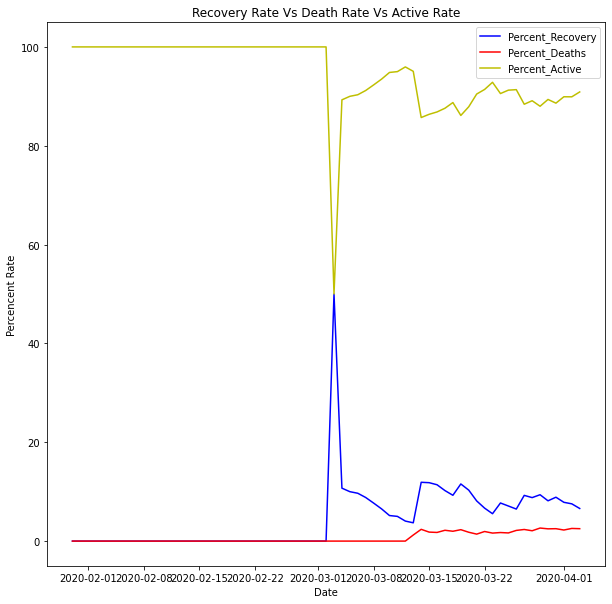

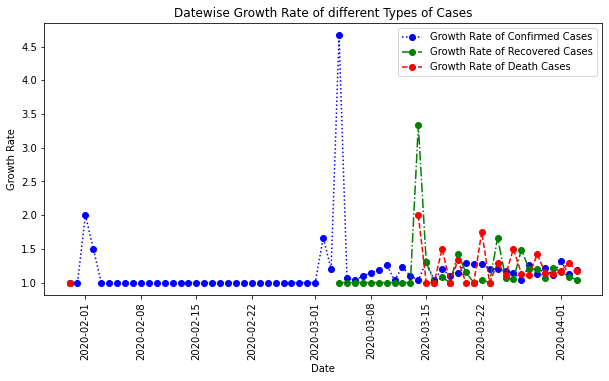

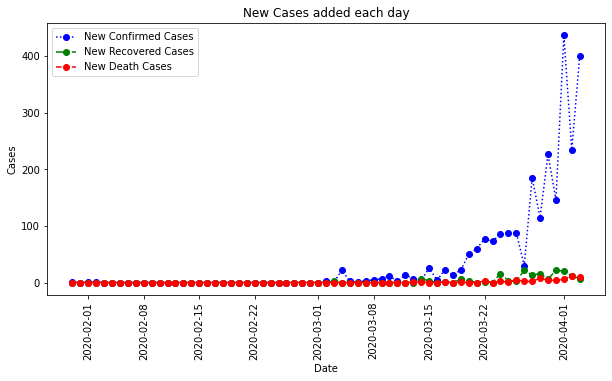

In [16]:
# Percent recovery and Percent Death rate Date wise in scatter plot
d = df.groupby(['Date'])['Confirmed','Deaths', 'Recovered'].sum().sort_values(by  ='Date',ascending= True)
# Active Cases in India Date Wise
d['Active'] = d['Confirmed']-d['Deaths']-d['Recovered']

d['Percent_Deaths'] = d['Deaths']/d['Confirmed']*100
d['Percent_Deaths']= round(d['Percent_Deaths'], 2)
d['Percent_Recovery']=d['Recovered']/d['Confirmed']*100
d['Percent_Recovery'] = round(d['Percent_Recovery'], 2)
d['Percent_Active']=d['Active']/d['Confirmed']*100
d['Percent_Active'] = round(d['Percent_Active'], 2)

plt.figure(figsize = (10,10))
plt.plot(d['Percent_Recovery'], 'b', label = 'Percent_Recovery')
plt.plot(d['Percent_Deaths'], 'r', label = 'Percent_Deaths')
plt.plot(d['Percent_Active'],'y',label = 'Percent_Active')
plt.title('Recovery Rate Vs Death Rate Vs Active Rate')
plt.xlabel('Date')
plt.ylabel('Percencent Rate')
plt.legend()
plt.show

# Datewise growth Rate
g = df.groupby(['Date'])['Confirmed','Deaths', 'Recovered'].sum().sort_values(by = 'Date', ascending = True)
print(g.iloc[-1])

increased_Confirmed=[]
increased_Recovered=[]
increased_Deaths=[]
z = 0
for z in range(g.shape[0]-1):
    increased_Confirmed.append(((g['Confirmed'].iloc[z+1])/g['Confirmed'].iloc[z]))
    increased_Recovered.append(((g['Recovered'].iloc[z+1])/g['Recovered'].iloc[z]))
    increased_Deaths.append(((g['Deaths'].iloc[z+1])/g['Deaths'].iloc[z]))
increased_Confirmed.insert(0,1)
increased_Recovered.insert(0,1)
increased_Deaths.insert(0,1)

plt.figure(figsize=(10,5))
plt.plot(g.index,increased_Confirmed,'bo',label="Growth Rate of Confirmed Cases",linestyle = ':')
plt.plot(g.index,increased_Recovered,'go',label="Growth Rate of Recovered Cases",linestyle = '-.')
plt.plot(g.index,increased_Deaths,'ro',label="Growth Rate of Death Cases",linestyle = '--')
plt.xticks(rotation=90)
plt.title("Datewise Growth Rate of different Types of Cases")
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.legend()

# Daily increase in Case
g = df.groupby(['Date'])['Confirmed','Deaths', 'Recovered'].sum().sort_values(by = 'Date', ascending = True)

ts=g.reset_index().sort_values('Date')
Confirmed=ts.Confirmed
Deaths=ts.Deaths
Recovered=ts.Recovered
New_Confirmed=[Confirmed[0]]
New_Deaths=[Deaths[0]]
New_Recovered=[Recovered[0]]
for i in range(1,len(Confirmed)):
    New_Confirmed.append(Confirmed[i]-Confirmed[i-1])
    New_Deaths.append(Deaths[i]-Deaths[i-1])
    New_Recovered.append(Recovered[i]-Recovered[i-1])
ts['New_Confirmed']=New_Confirmed
ts['New_Deaths']=New_Deaths
ts['New_Recovered']=New_Recovered
ts.head()

plt.figure(figsize=(10,5))
plt.plot(ts['Date'],ts['New_Confirmed'],'bo',label="New Confirmed Cases", linestyle = ':')
plt.plot(ts['Date'],ts['New_Recovered'],'go',label="New Recovered Cases",linestyle = '-.')
plt.plot(ts['Date'],ts['New_Deaths'],'ro',label="New Death Cases",linestyle = '--')
plt.xticks(rotation=90)
plt.title("New Cases added each day")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.legend()